In [ ]:
!pip install fairlearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from fairlearn.metrics import MetricFrame, false_negative_rate, false_positive_rate, true_positive_rate, true_negative_rate
import time
from sklearn import preprocessing
from collections import Counter
import seaborn as sns
import re

# Question 1

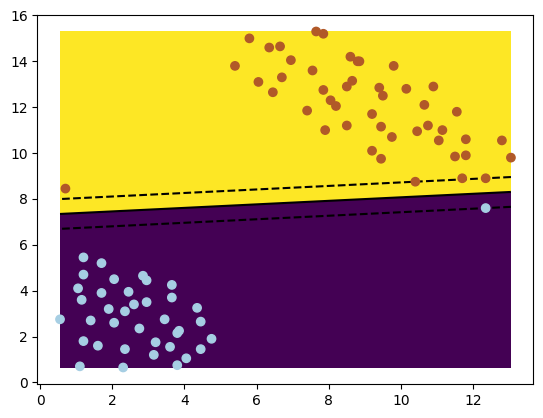

In [ ]:
# Load the dataset
data = pd.read_csv('dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Train the SVM model
svm_model = svm.SVC(kernel='linear',C=100)
svm_model.fit(X, y)

# Show the points
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Show the separating hyperplane
plt.axis('tight')
# Extract the limit of the data to construct the mesh
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Create the mesh and obtain the Z value returned by the SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
# separating hyperplane (Z=0)
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

plt.show()

# Question 2

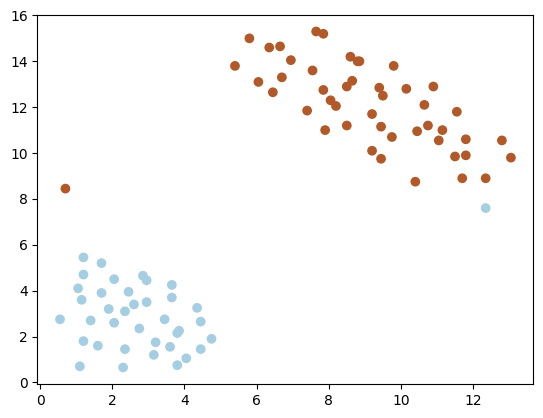

In [ ]:
# Load the dataset
data = pd.read_csv('dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Show the points
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

plt.show()

# Question 3

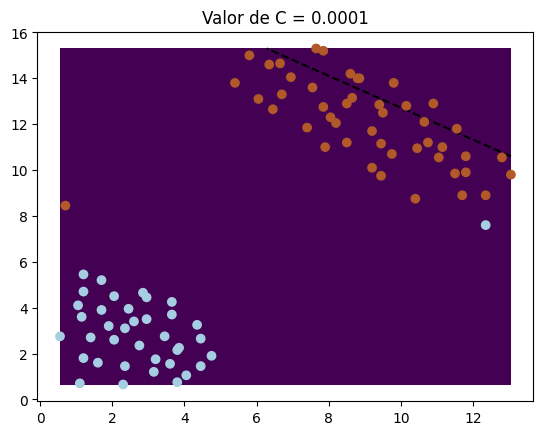

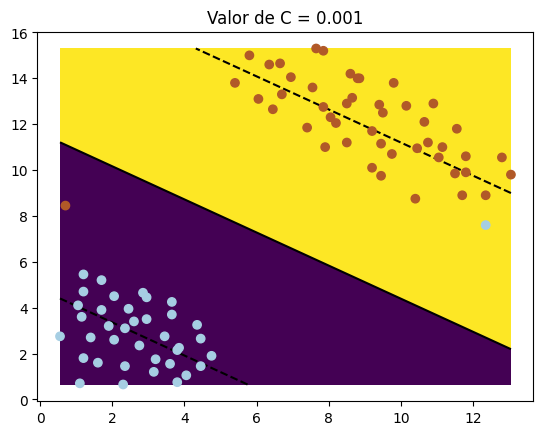

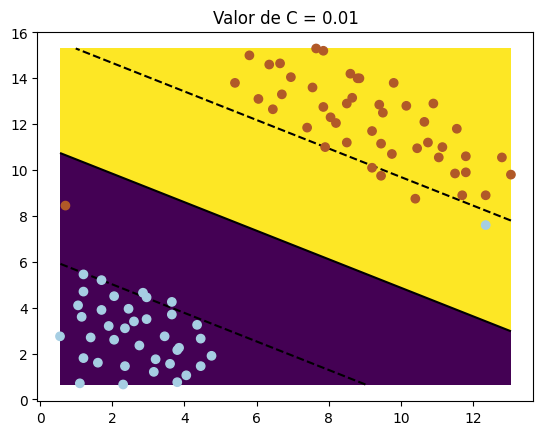

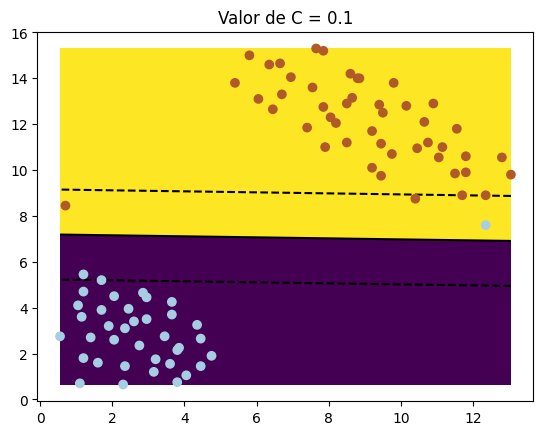

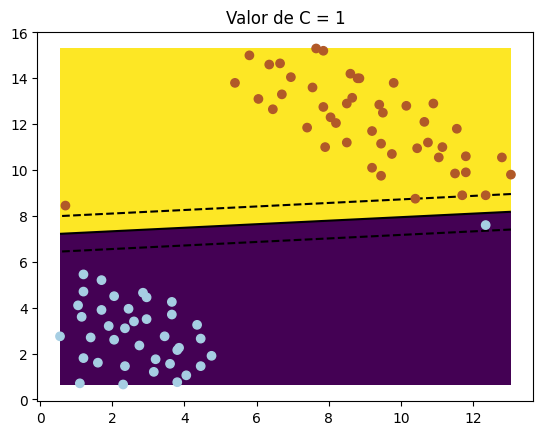

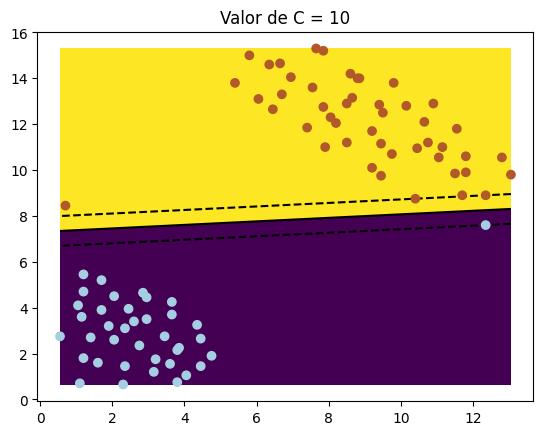

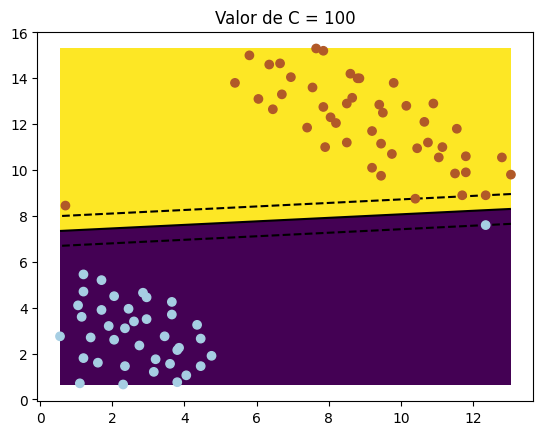

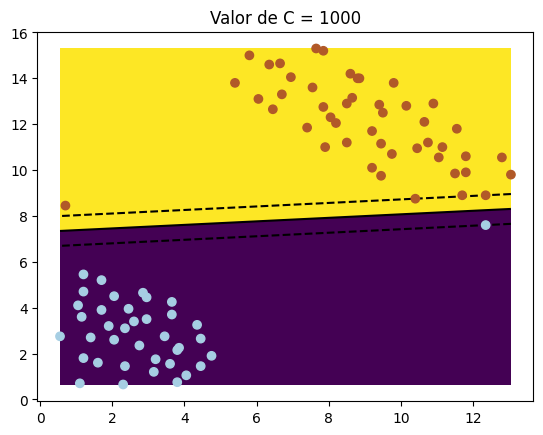

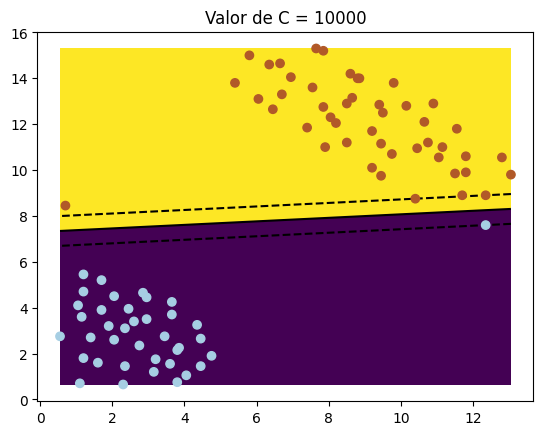

In [ ]:
def run_svm_with_different_C_values(C_values):
    for C in C_values:
        # Load the dataset
        data = pd.read_csv('dataset1.csv', header=None)
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values

        # Train the SVM model
        svm_model = svm.SVC(kernel='linear', C=C)
        svm_model.fit(X, y)

        # Show the points
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

        # Show the separating hyperplane
        plt.axis('tight')
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()

        # Create the mesh and obtain the Z value returned by the SVM
        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the separating hyperplane (Z=0)
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        plt.title("Valor de C = {}".format(C))
        plt.show()

# Valores de C a probar
C_values = [10**i for i in range(-4, 5)]

# Ejecutar la función con los valores de C dados
run_svm_with_different_C_values(C_values)

# Question 4

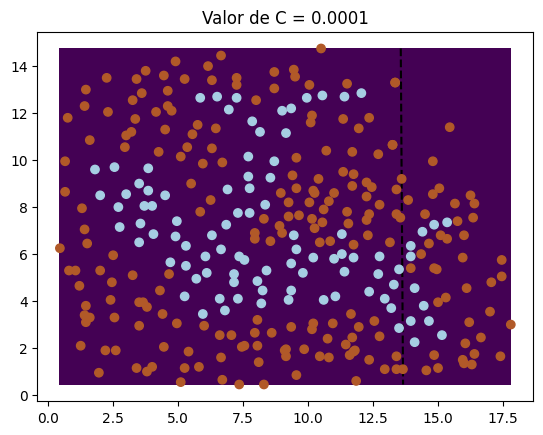

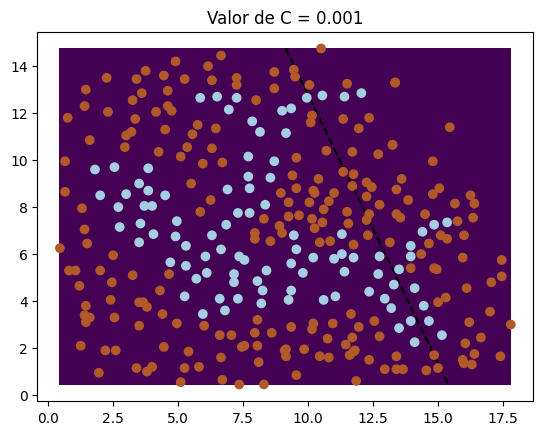

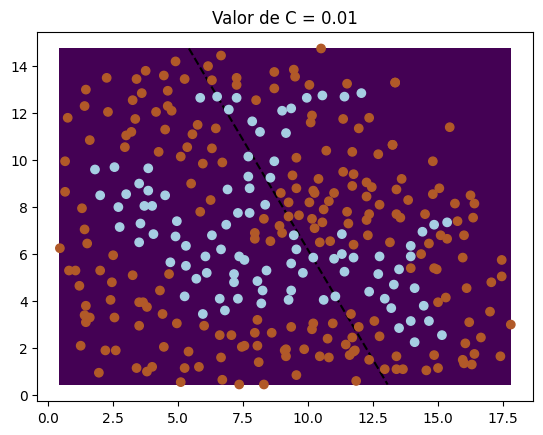

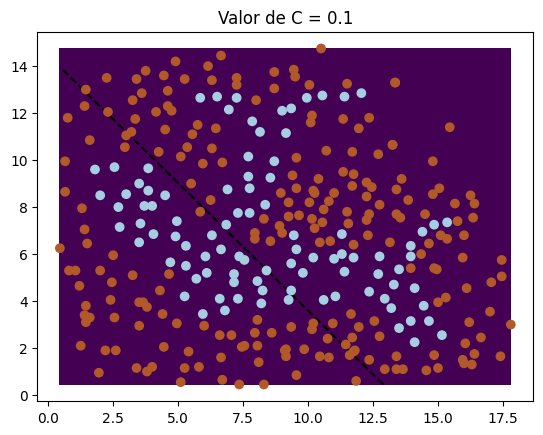

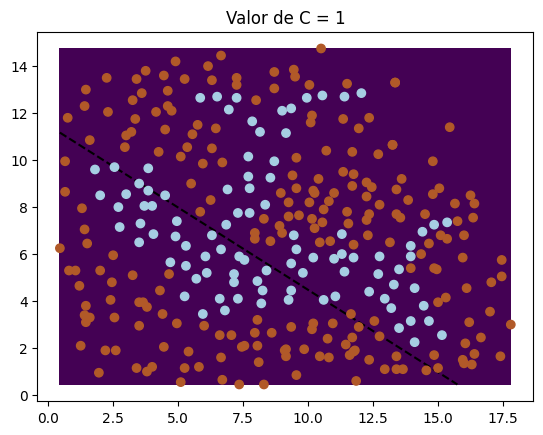

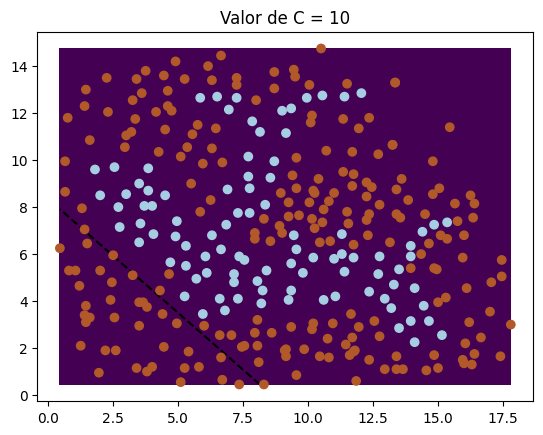

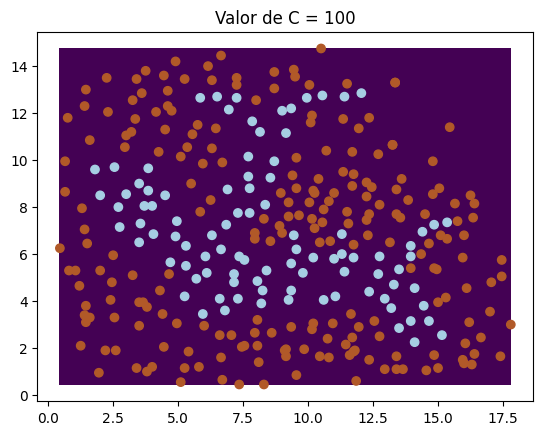

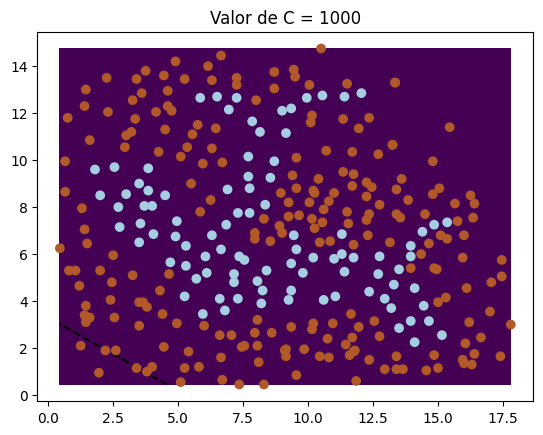

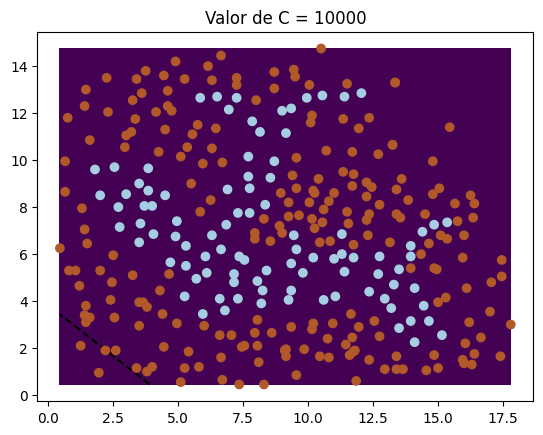

In [ ]:
def run_svm_with_different_C_values(C_values):
    for C in C_values:
        # Load the dataset
        data = pd.read_csv('dataset2.csv', header=None)
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values

        # Train the SVM model
        svm_model = svm.SVC(kernel='linear', C=C)
        svm_model.fit(X, y)

        # Show the points
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

        # Show the separating hyperplane
        plt.axis('tight')
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()

        # Create the mesh and obtain the Z value returned by the SVM
        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the separating hyperplane (Z=0)
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        plt.title("Valor de C = {}".format(C))
        plt.show()

# Valores de C a probar
C_values = [10**i for i in range(-4, 5)]

# Ejecutar la función con los valores de C dados
run_svm_with_different_C_values(C_values)

# Question 5

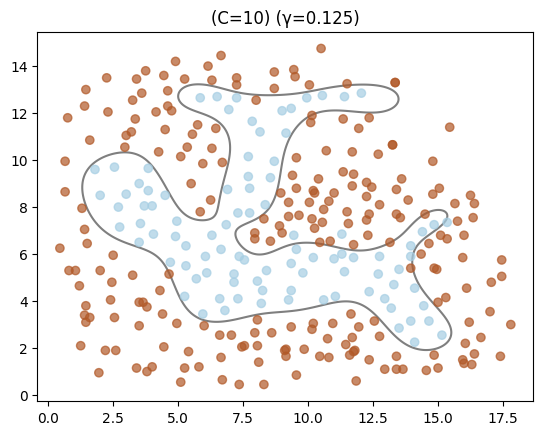

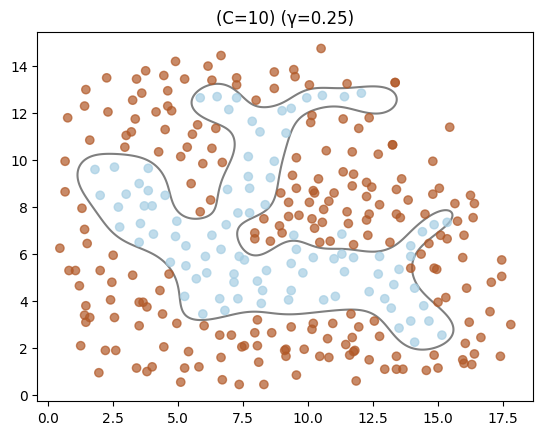

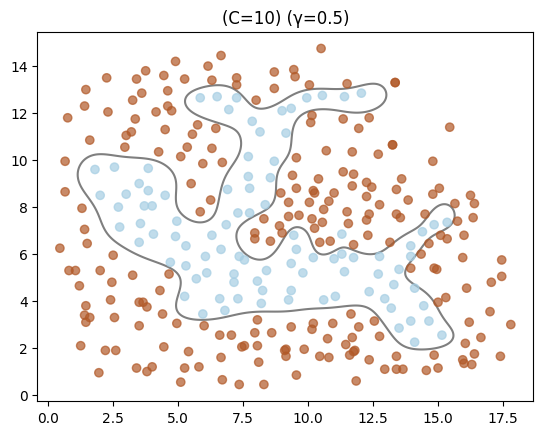

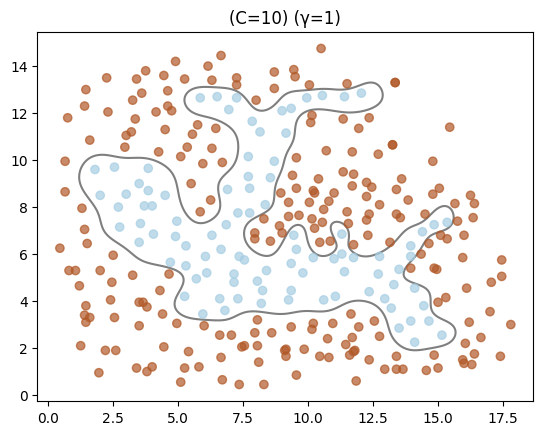

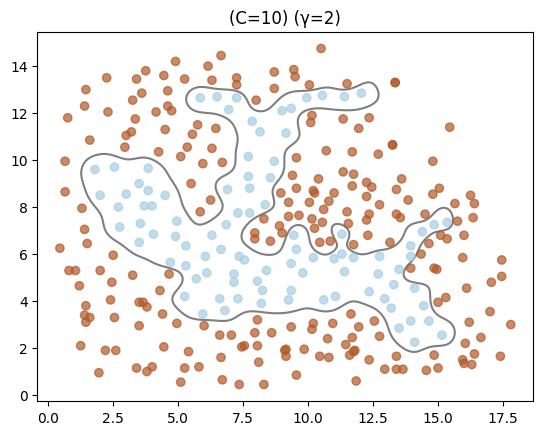

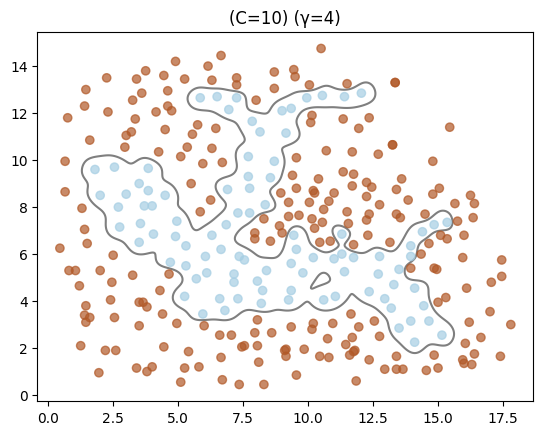

In [ ]:
# Load the dataset
data = pd.read_csv('dataset2.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Valores de gamma a probar
gamma_values = [2 ** i for i in range(-3, 3)]

# Iterar sobre cada valor de gamma
for gamma in gamma_values:
    # Train the SVM model with RBF kernel
    svm_model = svm.SVC(kernel='rbf', C=10, gamma=gamma)
    svm_model.fit(X, y)

    # Show the points
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, alpha=0.7)

    # Show the decision boundaries
    plt.axis('tight')
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # Create the meshgrid and obtain the Z value returned by the SVM
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Make a color plot including the margin hyperplanes and the separating hyperplane
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

    plt.title("(C=10) (γ={})".format(gamma))
    plt.show()

## Question 5.2

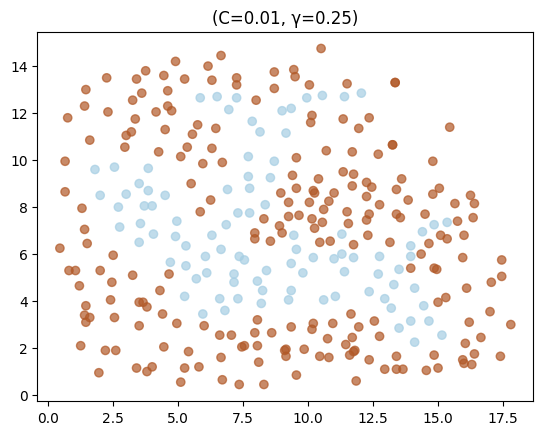

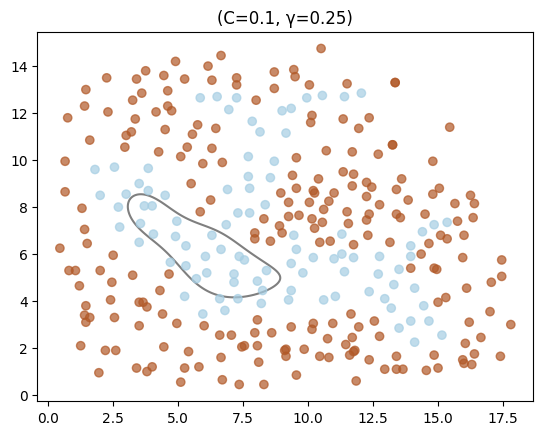

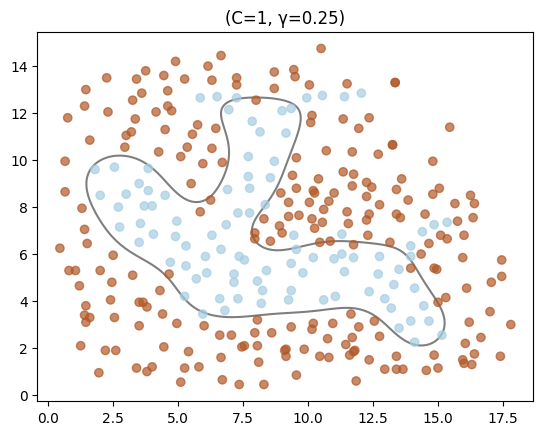

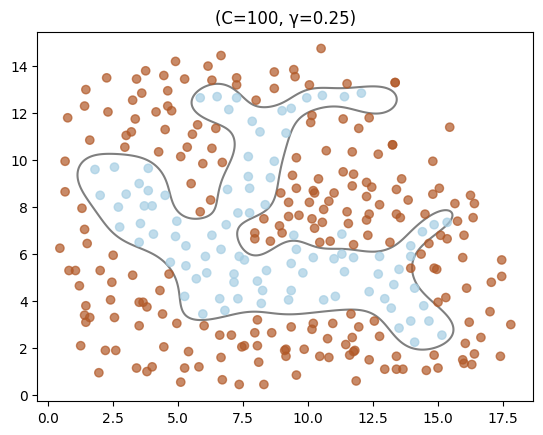

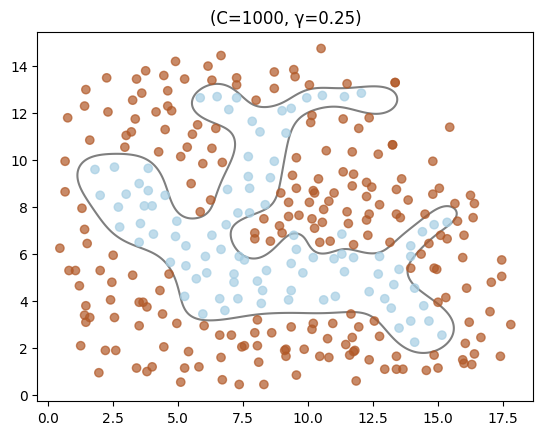

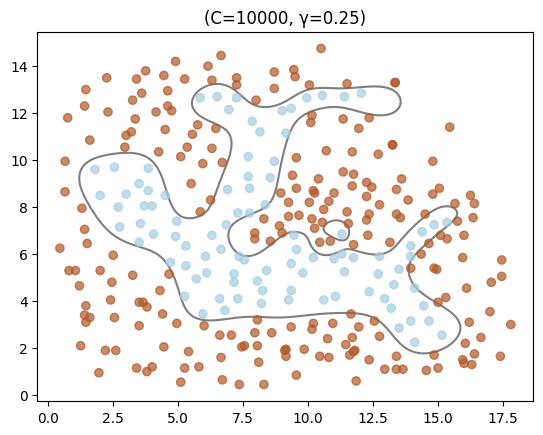

In [ ]:
# Load the dataset
data = pd.read_csv('dataset2.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Mejor valor encontrado para gamma
best_gamma = 0.25

# Valores de C a probar
C_values = [0.01, 0.1, 1, 100, 1000, 10000]

# Iterar sobre cada valor de C
for C in C_values:
    # Train the SVM model with RBF kernel
    svm_model = svm.SVC(kernel='rbf', C=C, gamma=best_gamma)
    svm_model.fit(X, y)

    # Show the points
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, alpha=0.7)

    # Show the decision boundaries
    plt.axis('tight')
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # Create the meshgrid and obtain the Z value returned by the SVM
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Make a color plot including the margin hyperplanes and the separating hyperplane
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

    plt.title("(C={}, γ={})".format(C, best_gamma))
    plt.show()

# Question 6

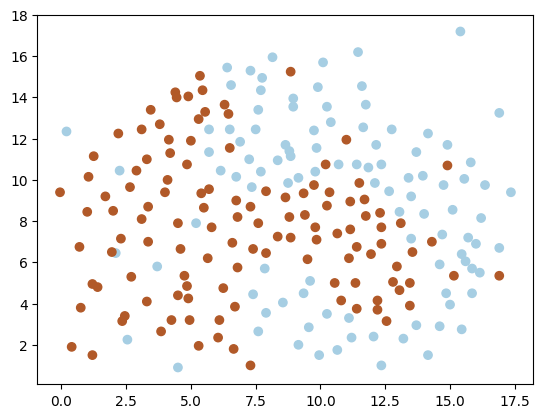

In [ ]:
# Load the dataset
data = pd.read_csv('dataset3.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Show the points
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

plt.show()

# Question 7

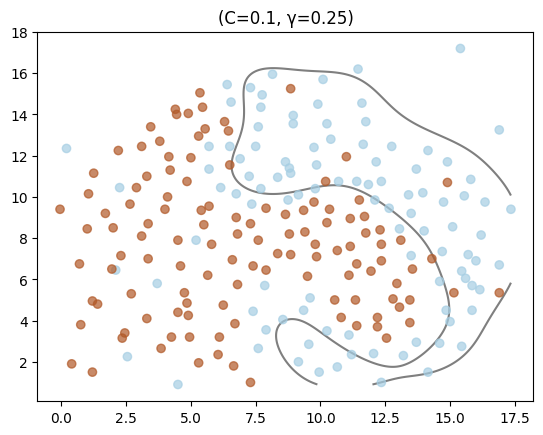

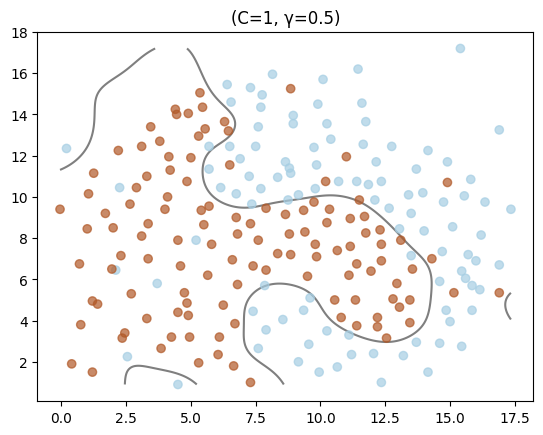

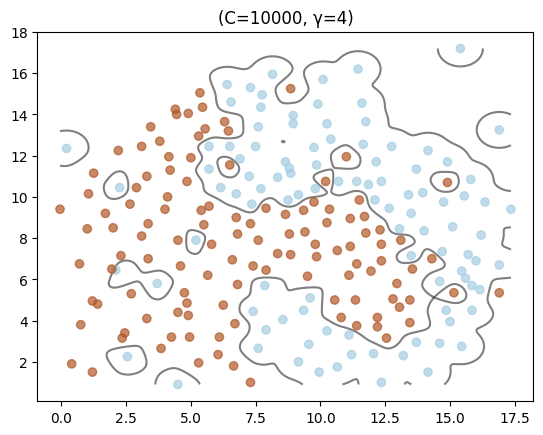

In [ ]:
# Load the dataset
data = pd.read_csv('dataset3.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the combinations of gamma and C to try
combinations = [
    (0.25, 0.1),
    (0.5, 1),
    (4, 10000)
]

# Iterate over each combination
for gamma_value, C_value in combinations:
    # Train the SVM model with RBF kernel
    svm_model = svm.SVC(kernel='rbf', C=C_value, gamma=gamma_value)
    svm_model.fit(X, y)

    # Show the points
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, alpha=0.7)

    # Show the decision boundaries
    plt.axis('tight')
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # Create the meshgrid and obtain the Z value returned by the SVM
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Make a color plot including the margin hyperplanes and the separating hyperplane
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

    plt.title("(C={}, γ={})".format(C_value, gamma_value))
    plt.show()

# Question 8


Repetition 1:
Best parameters: {'C': 1, 'gamma': 2}
Accuracy on the test set: 0.9107142857142857


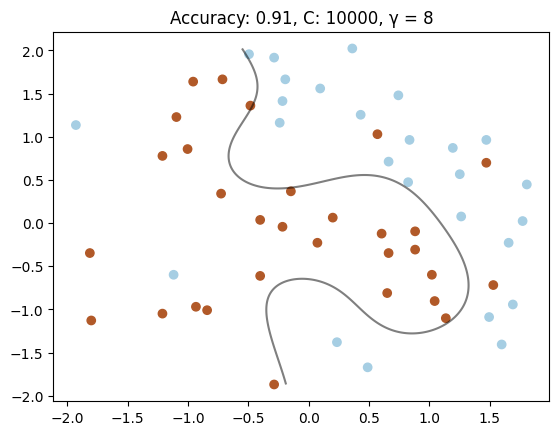


Repetition 2:
Best parameters: {'C': 1, 'gamma': 8}
Accuracy on the test set: 0.875


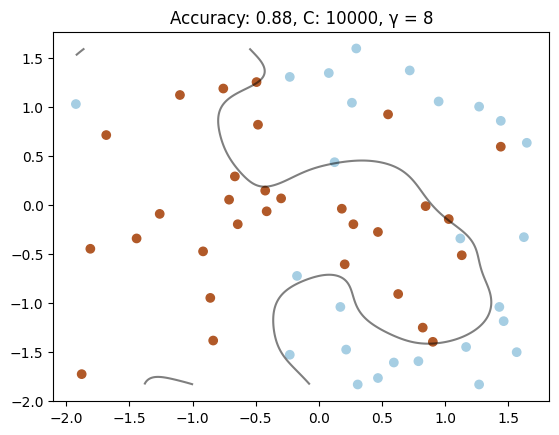


Repetition 3:
Best parameters: {'C': 10, 'gamma': 1}
Accuracy on the test set: 0.9285714285714286


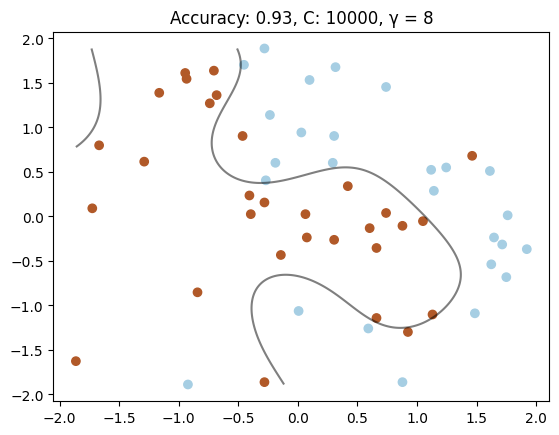


Repetition 4:
Best parameters: {'C': 10000, 'gamma': 1}
Accuracy on the test set: 0.8571428571428571


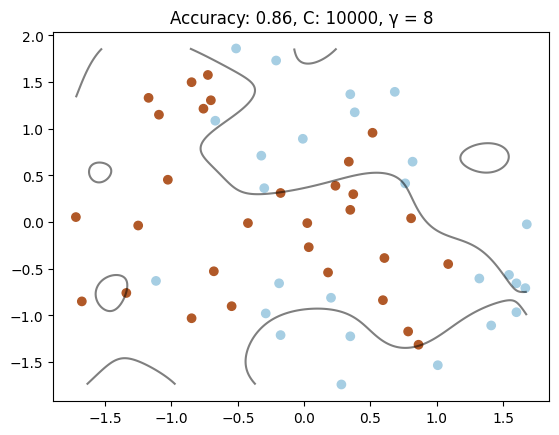


Repetition 5:
Best parameters: {'C': 1000, 'gamma': 0.5}
Accuracy on the test set: 0.8928571428571429


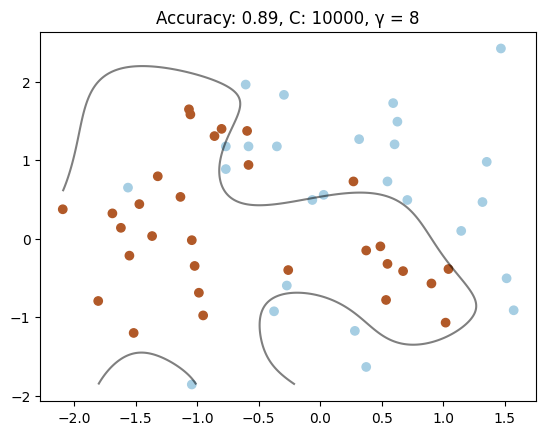


Repetition 6:
Best parameters: {'C': 1, 'gamma': 4}
Accuracy on the test set: 0.8035714285714286


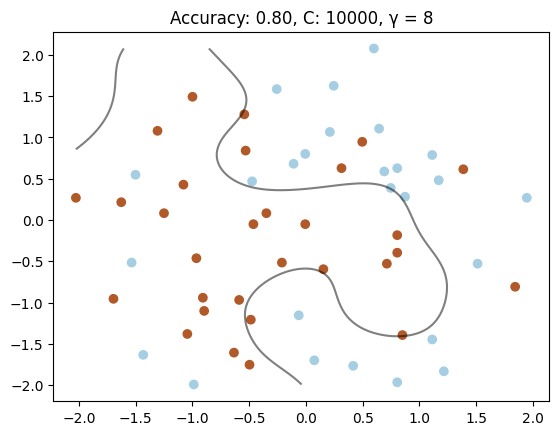

In [ ]:
# Load the dataset
data = pd.read_csv('dataset3.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the number of repetitions
num_repetitions = 6

for i in range(num_repetitions):
    print(f"\nRepetition {i + 1}:")

    # Divide the dataset into training and test sets with a 75-25 split using stratified random sampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=i)

    # Standardize the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Define the parameters grid for C and gamma
    params_grid = {'C': [0.001,0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.125, 0.25, 0.5, 1, 2, 4, 8]}

    best_accuracy = 0
    best_params = None

    # Train the model with different combinations of C and gamma
    for C in params_grid['C']:
        for gamma in params_grid['gamma']:
            # Train the SVM model
            svm_model = SVC(kernel='rbf', C=C, gamma=gamma)
            svm_model.fit(X_train_std, y_train)

            # Evaluate the model on the test set
            y_pred = svm_model.predict(X_test_std)
            accuracy = accuracy_score(y_test, y_pred)

            # Update best accuracy and parameters if necessary
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'C': C, 'gamma': gamma}
                best_model = svm_model

    print("Best parameters:", best_params)
    print("Accuracy on the test set:", best_accuracy)

    # Plot the decision boundaries and scatter plot of the test set
    plt.figure()

    # Scatter plot of the test set
    plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired)

    # Plot decision boundaries
    plt.axis('tight')
    x_min, x_max = X_test_std[:, 0].min(), X_test_std[:, 0].max()
    y_min, y_max = X_test_std[:, 1].min(), X_test_std[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = best_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

    plt.title(f"Accuracy: {best_accuracy:.2f}, C: {C}, γ = {gamma}")
    plt.show()

# Question 9


Iteration 1:
Best parameters: {'C': 10.0, 'gamma': 0.5946035575013605}
Accuracy on the test set: 0.8392857142857143


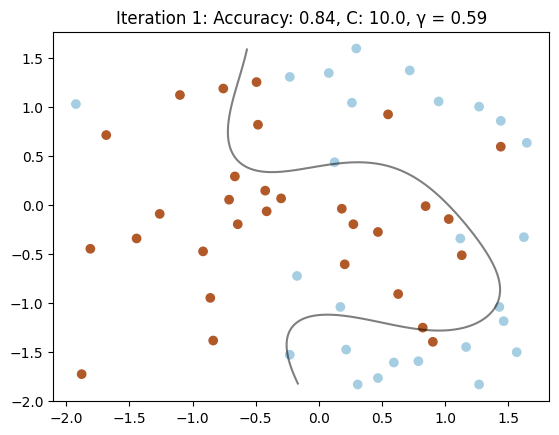


Iteration 2:
Best parameters: {'C': 1.0, 'gamma': 3.0844216508158815}
Accuracy on the test set: 0.8928571428571429


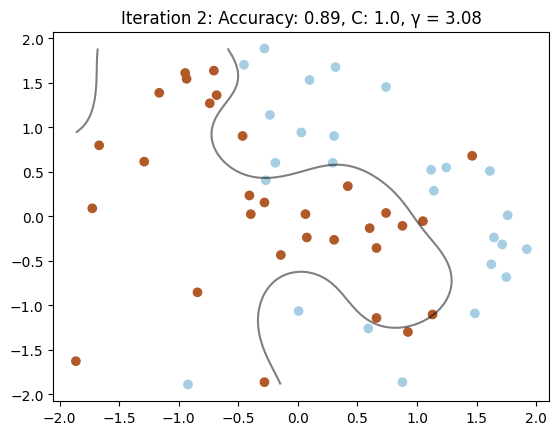


Iteration 3:
Best parameters: {'C': 10.0, 'gamma': 0.5946035575013605}
Accuracy on the test set: 0.7321428571428571


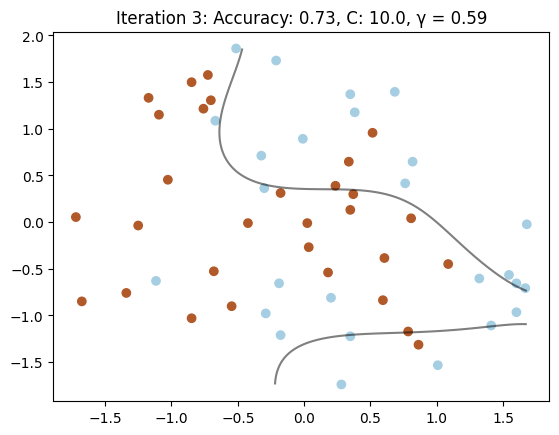


Iteration 4:
Best parameters: {'C': 1.0, 'gamma': 3.0844216508158815}
Accuracy on the test set: 0.8392857142857143


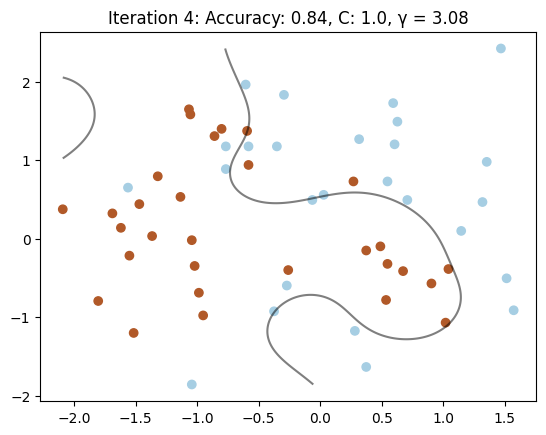


Iteration 5:
Best parameters: {'C': 1.0, 'gamma': 3.0844216508158815}
Accuracy on the test set: 0.7857142857142857


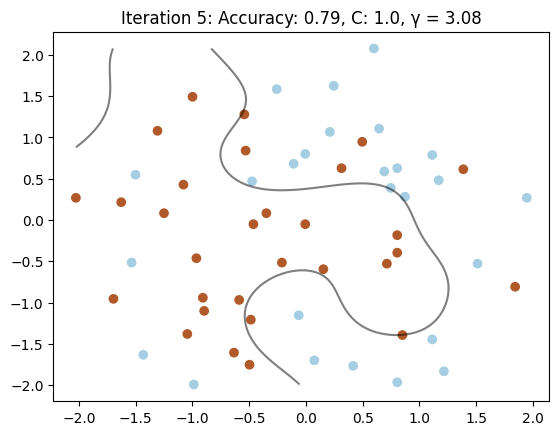


Iteration 6:
Best parameters: {'C': 1.0, 'gamma': 3.0844216508158815}
Accuracy on the test set: 0.8571428571428571


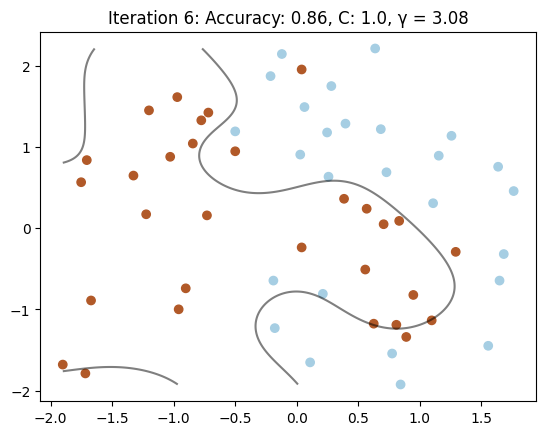

In [ ]:
# Load the dataset
data = pd.read_csv('dataset3.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the number of iterations
num_iterations = 6

for iteration in range(1, num_iterations + 1):
    print(f"\nIteration {iteration}:")

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=iteration)

    # Standardize the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Define the parameter grid to search
    Cs = np.logspace(-5, 5, num=11, base=10)
    Gs = np.logspace(-15, 4, num=9, base=2)

    # Instantiate the SVM classifier
    svm = SVC(kernel='rbf')

    # Perform grid search using GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1, cv=5)
    grid_search.fit(X_train_std, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on the test set:", accuracy)

    # Plot the decision boundaries and scatter plot of the test set
    plt.figure()

    # Scatter plot of the test set
    plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired)

    # Plot decision boundaries
    plt.axis('tight')
    x_min, x_max = X_test_std[:, 0].min(), X_test_std[:, 0].max()
    y_min, y_max = X_test_std[:, 1].min(), X_test_std[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = grid_search.best_estimator_.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

    plt.title(f"Iteration {iteration}: Accuracy: {accuracy:.2f}, C: {best_params['C']}, γ = {best_params['gamma']:.2f}")
    plt.show()


# Question 11

Best parameters: {'C': 1.0, 'gamma': 3.0844216508158815}
Accuracy on the test set: 0.8409090909090909


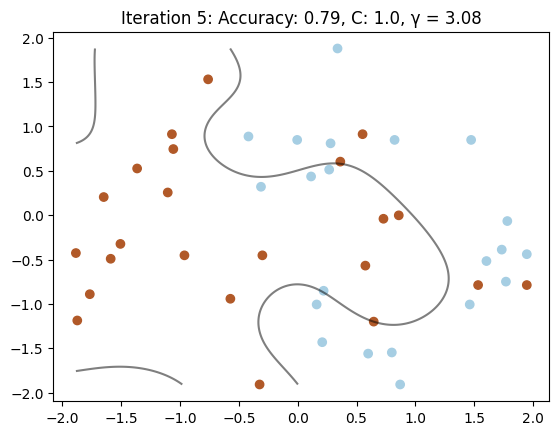

In [ ]:
# Load the dataset
data = pd.read_csv('dataset3.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the parameter grid to search
Cs = np.logspace(-5, 5, num=11, base=10)
Gs = np.logspace(-15, 4, num=9, base=2)

best_accuracy = 0
best_params = None

# K-fold nested cross-validation
kf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf_outer.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    for C in Cs:
        for gamma in Gs:
            # Initialize SVM classifier
            svm = SVC(kernel='rbf', C=C, gamma=gamma)

            # Perform K-fold cross-validation on the training set
            kf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
            val_scores = []
            for train_idx, val_idx in kf_inner.split(X_train_std, y_train):
                X_train_inner, X_val = X_train_std[train_idx], X_train_std[val_idx]
                y_train_inner, y_val = y_train[train_idx], y_train[val_idx]

                # Train the model on the inner training set
                svm.fit(X_train_inner, y_train_inner)

                # Evaluate the model on the inner validation set
                y_pred_val = svm.predict(X_val)
                val_score = accuracy_score(y_val, y_pred_val)
                val_scores.append(val_score)

            # Compute the average validation score
            avg_val_score = np.mean(val_scores)

            # Update best accuracy and parameters if necessary
            if avg_val_score > best_accuracy:
                best_accuracy = avg_val_score
                best_params = {'C': C, 'gamma': gamma}

# Train the model on the entire training set using the best parameters
svm_best = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_best.fit(X_train_std, y_train)

# Evaluate the model on the test set
X_test_std = scaler.transform(X_test)
y_pred_test = svm_best.predict(X_test_std)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Best parameters:", best_params)
print("Accuracy on the test set:", test_accuracy)

# Plot the decision boundaries and scatter plot of the test set
plt.figure()

# Scatter plot of the test set
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired)

# Plot decision boundaries
plt.axis('tight')
x_min, x_max = X_test_std[:, 0].min(), X_test_std[:, 0].max()
y_min, y_max = X_test_std[:, 1].min(), X_test_std[:, 1].max()
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = grid_search.best_estimator_.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

plt.title(f"Iteration {iteration}: Accuracy: {accuracy:.2f}, C: {best_params['C']}, γ = {best_params['gamma']:.2f}")
plt.show()

# Question 12

In [ ]:
# Load the dataset
train_set = pd.read_csv('train_compas.csv', header=None)
X_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values
test_set = pd.read_csv('test_compas.csv', header=None)
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

# Define the parameter grid to search
Cs = np.logspace(-3, 3, num=7, base=10)
Gs = np.logspace(-3, 3, num=7, base=10)

# Instantiate the SVM classifier
svm = SVC(kernel='rbf')

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Best parameters: {'C': 1000.0, 'gamma': 0.01}
Accuracy on the test set: 0.667960088691796


# Question 13

In [ ]:
# Load the dataset
train_set = pd.read_csv('train_compas.csv', header=None)
X_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values
test_set = pd.read_csv('test_compas.csv', header=None)
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

# Define the parameter grid to search
Cs = np.logspace(-3, 3, num=7, base=10)
Gs = np.logspace(-3, 3, num=7, base=10)

# Perform grid search using GridSearchCV
for k in [3, 5, 10]:
    print(f"Iteration with k={k}:")
    start_time = time.time()
    grid_search = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1, cv=k)
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on the test set:", accuracy)

    # Display computational time
    computational_time = end_time - start_time
    print("Computational time:", computational_time, "seconds")

Iteration with k=3:
Best parameters: {'C': 1000.0, 'gamma': 0.01}
Accuracy on the test set: 0.667960088691796
Computational time: 147.7992959022522 seconds
Iteration with k=5:
Best parameters: {'C': 1000.0, 'gamma': 0.01}
Accuracy on the test set: 0.667960088691796
Computational time: 338.42103266716003 seconds
Iteration with k=10:
Best parameters: {'C': 100.0, 'gamma': 0.001}
Accuracy on the test set: 0.667960088691796
Computational time: 844.5719799995422 seconds


# Question 14

In [ ]:
# Load the dataset
data_train = pd.read_csv('train_spam.csv', header=None)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values

# Print original positive label values
print(f"Positive label before pre-processing: {y_train}")

# Swap class labels: 0 becomes 1 and vice versa
y_train = np.where(y_train == 1, 0, 1).astype(float)

# Print modified positive label values after pre-processing
print(f"Positive label after pre-processing: {y_train}")

Positive label before pre-processing: [1 1 0 ... 1 0 0]
Positive label after pre-processing: [0. 0. 1. ... 0. 1. 1.]


In [ ]:
# Load the dataset
data_train = pd.read_csv(f'train_spam.csv', header=None)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values

# Define hyperparameters for Grid Search
Cs = np.logspace(-5, 20, num=10, base=2)
Gs = np.logspace(-15, 3, num=10, base=2)

# Initialize SVM model and Grid Search
svm_model = svm.SVC(kernel='rbf')
optimal_params = GridSearchCV(estimator=svm_model, param_grid={'C': Cs, 'gamma': Gs}, n_jobs=-1, cv=10)

# Train the model and measure time
start_time = time.time()
optimal_params.fit(X_train, y_train)
end_time = time.time()
print(f"Elapsed time for optimization: {(end_time - start_time):.4f} seconds")

# Get the best hyperparameters
best_c = pd.DataFrame.from_dict(optimal_params.cv_results_).sort_values('rank_test_score').iloc[0, :]['param_C']
best_gamma = pd.DataFrame.from_dict(optimal_params.cv_results_).sort_values('rank_test_score').iloc[0, :]['param_gamma']

# Load the test dataset
data_test = pd.read_csv(f'test_spam.csv', header=None)
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

# Apply the label changes
y_test = np.where(y_test == 1, 0, 1).astype(float)

# Print results
print(f"The process has been completed. Best hyper-parameters found are:\n\t- C: {best_c:.4f}\n\t- Gamma: {best_gamma:.4f}")
print(f"Final accuracy in training: {optimal_params.score(X_train, y_train):.4f}")
print(f"Final accuracy in tests: {optimal_params.score(X_test, y_test):.4f}")

In [ ]:
# Calculate predictions
y_predicted_train = optimal_params.predict(X_train)
y_predicted_test = optimal_params.predict(X_test)

# Calculate confusion matrices
cf_train = confusion_matrix(y_train, y_predicted_train)
cf_test = confusion_matrix(y_test, y_predicted_test)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cf_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(1, 2, 2)
sns.heatmap(cf_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix for test dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
train_gender_bin = np.floor(y_train)
test_gender_bin = np.floor(y_test)

# 1 for women / 0 for men
train_gender_bin[train_gender_bin == -1] = 0
test_gender_bin[test_gender_bin == -1] = 0

metrics = {
    'false negative rate': false_negative_rate,
    'false positive rate': false_positive_rate,
    'true negative rate': true_negative_rate,
    'true positive rate': true_positive_rate
}

train_fm = MetricFrame(metrics=metrics, y_true=y_train, y_pred=y_predicted_train, sensitive_features=train_gender_bin)
test_fm = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_predicted_test, sensitive_features=test_gender_bin)

train_fn0 = train_fm.by_group.to_dict()['false negative rate'][0.0] * 100
train_fn1 = train_fm.by_group.to_dict()['false negative rate'][1.0] * 100
test_fn0 = test_fm.by_group.to_dict()['false negative rate'][0.0] * 100
test_fn1 = test_fm.by_group.to_dict()['false negative rate'][1.0] * 100

train_fp0 = train_fm.by_group.to_dict()['false positive rate'][0.0] * 100
train_fp1 = train_fm.by_group.to_dict()['false positive rate'][1.0] * 100
test_fp0 = test_fm.by_group.to_dict()['false positive rate'][0.0] * 100
test_fp1 = test_fm.by_group.to_dict()['false positive rate'][1.0] * 100

train_tp0 = train_fm.by_group.to_dict()['true positive rate'][0.0] * 100
train_tp1 = train_fm.by_group.to_dict()['true positive rate'][1.0] * 100
test_tp0 = test_fm.by_group.to_dict()['true positive rate'][0.0] * 100
test_tp1 = test_fm.by_group.to_dict()['true positive rate'][1.0] * 100

train_tn0 = train_fm.by_group.to_dict()['true negative rate'][0.0] * 100
train_tn1 = train_fm.by_group.to_dict()['true negative rate'][1.0] * 100
test_tn0 = test_fm.by_group.to_dict()['true negative rate'][0.0] * 100
test_tn1 = test_fm.by_group.to_dict()['true negative rate'][1.0] * 100

print("Training FN0: %.2f%% +- %.2f%%" % (np.mean(train_fn0), np.std(train_fn0)))
print("Training FN1: %.2f%% +- %.2f%%" % (np.mean(train_fn1), np.std(train_fn1)))
print("Test FN0: %.2f%% +- %.2f%%" % (np.mean(test_fn0), np.std(test_fn0)))
print("Test FN1: %.2f%% +- %.2f%%" % (np.mean(test_fn1), np.std(test_fn1)))

print("Training FP0: %.2f%% +- %.2f%%" % (np.mean(train_fp0), np.std(train_fp0)))
print("Training FP1: %.2f%% +- %.2f%%" % (np.mean(train_fp1), np.std(train_fp1)))
print("Test FP0: %.2f%% +- %.2f%%" % (np.mean(test_fp0), np.std(test_fp0)))
print("Test FP1: %.2f%% +- %.2f%%" % (np.mean(test_fp1), np.std(test_fp1)))

print("Training TP0: %.2f%% +- %.2f%%" % (np.mean(train_tp0), np.std(train_tp0)))
print("Training TP1: %.2f%% +- %.2f%%" % (np.mean(train_tp1), np.std(train_tp1)))
print("Test TP0: %.2f%% +- %.2f%%" % (np.mean(test_tp0), np.std(test_tp0)))
print("Test TP1: %.2f%% +- %.2f%%" % (np.mean(test_tp1), np.std(test_tp1)))

print("Training TN0: %.2f%% +- %.2f%%" % (np.mean(train_tn0), np.std(train_tn0)))
print("Training TN1: %.2f%% +- %.2f%%" % (np.mean(train_tn1), np.std(train_tn1)))
print("Test TN0: %.2f%% +- %.2f%%" % (np.mean(test_tn0), np.std(test_tn0)))
print("Test TN1: %.2f%% +- %.2f%%" % (np.mean(test_tn1), np.std(test_tn1)))

print(f"F1-score in training: {f1_score(y_train, y_predicted_train)}")
print(f"F1-score in tests: {f1_score(y_test, y_predicted_test)}")

# Question 15

In [ ]:
# Load the dataset
data_train = pd.read_csv(f'train_spam.csv', header=None)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values

print(f"Positive label before pre-processing: {y_train}")

y_train = np.where(y_train == 1, 0, 1).astype('float')

print(f"Positive label after pre-processing: {y_train}")

label_train = data_train.iloc[:, -2].values

# Load the test dataset
data_test = pd.read_csv(f'test_spam.csv', header=None)
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

# Applying the label changes
y_test = np.where(y_test == 1, 0, 1).astype('float')
label_test = data_test.iloc[:, -2].values

# Question 16

In [ ]:
# Load the dataset
data_train = pd.read_csv('train_spam.csv', header=None)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values
data_test = pd.read_csv('test_spam.csv', header=None)
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define the parameter grid to search
Cs = [10e-2, 10e-1, 10e0, 10e1]

# Instantiate the SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=dict(C=Cs), n_jobs=-1, cv=5)
grid_search.fit(X_train_std, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Best parameters: {'C': 0.1}
Accuracy on the test set: 0.974


# Question 17

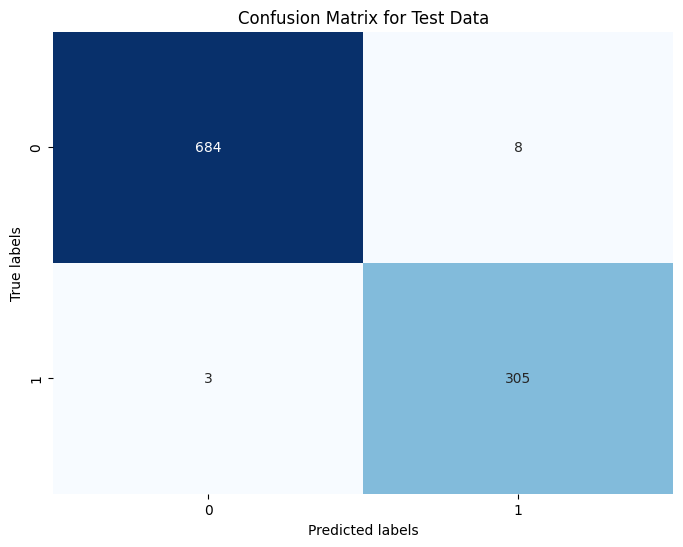

In [ ]:
svm_model = svm.SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)
y_test_pred = svm_model.predict(X_test)
cf_tests = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tests, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

## Question 17.1

In [ ]:
# Determine the emails that were wrongly predicted
emails_wrongly_predicted = y_test_pred != y_test
print(f"A total of {np.sum(emails_wrongly_predicted)} emails were wrongly predicted")

# Get the indexes of the wrongly predicted emails
indexes_emails_wrongly_predicted = [index for index, item in enumerate(emails_wrongly_predicted) if item]
print(indexes_emails_wrongly_predicted)

A total of 11 emails were wrongly predicted
[9, 21, 58, 73, 147, 328, 407, 526, 560, 842, 881]


In [ ]:
vocab_list = []

with open(f"vocab.txt") as f:
    for line in f.readlines():
        new_line = re.search(r"[a-zA-Z_][a-zA-Z0-9_]*", line.strip())
        vocab_list.append(new_line.group())

print(vocab_list)

['aa', 'ab', 'abil', 'abl', 'about', 'abov', 'absolut', 'abus', 'ac', 'accept', 'access', 'accord', 'account', 'achiev', 'acquir', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'add', 'addit', 'address', 'administr', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'ae', 'af', 'affect', 'affili', 'afford', 'africa', 'after', 'ag', 'again', 'against', 'agenc', 'agent', 'ago', 'agre', 'agreement', 'aid', 'air', 'al', 'alb', 'align', 'all', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alsa', 'also', 'altern', 'although', 'alwai', 'am', 'amaz', 'america', 'american', 'among', 'amount', 'amp', 'an', 'analysi', 'analyst', 'and', 'ani', 'anim', 'announc', 'annual', 'annuiti', 'anoth', 'answer', 'anti', 'anumb', 'anybodi', 'anymor', 'anyon', 'anyth', 'anywai', 'anywher', 'aol', 'ap', 'apolog', 'app', 'appar', 'appear', 'appl', 'appli', 'applic', 'appreci', 'approach', 'approv', 'apt', 'ar', 'archiv', 'area', 'aren', 'argument', 'arial', 'arm', 'around', 'arrai', 'a

## Question 17.2

In [ ]:
email_wrongly_predicted_index = 9

print(f"Total of matched words detected in email number {email_wrongly_predicted_index}: {data_test.iloc[email_wrongly_predicted_index].sum(axis=0)}\n\n")

for index, (k, v) in enumerate(data_test.iloc[email_wrongly_predicted_index].items()):
    if v == 1:
        print(f"Word number {index} it's: {vocab_list[index - 1]}")

print(f"\n\nPrediction: {y_test_pred[email_wrongly_predicted_index]} ({'spam' if y_test_pred[email_wrongly_predicted_index] else 'not spam'}). Expected value: {y_test[email_wrongly_predicted_index]} ({'spam' if y_test[email_wrongly_predicted_index] else 'not spam'})")

Total of matched words detected in email number 9: 13


Word number 530 it's: email
Word number 665 it's: food
Word number 734 it's: ground
Word number 798 it's: http
Word number 839 it's: info
Word number 875 it's: ireland
Word number 959 it's: link
Word number 960 it's: linux
Word number 994 it's: main
Word number 1609 it's: subscrib
Word number 1743 it's: ultim
Word number 1772 it's: useless
Word number 1899 it's: zip


Prediction: 0 (not spam). Expected value: 1 (spam)


In [ ]:
email_wrongly_predicted_index = 21

print(f"Total of matched words detected in email number {email_wrongly_predicted_index}: {data_test.iloc[email_wrongly_predicted_index].sum(axis=0)}\n\n")

for index, (k, v) in enumerate(data_test.iloc[email_wrongly_predicted_index].items()):
    if v == 1:
        print(f"Word number {index} it's: {vocab_list[index - 1]}")

print(f"\n\nPrediction: {y_test_pred[email_wrongly_predicted_index]} ({'spam' if y_test_pred[email_wrongly_predicted_index] else 'not spam'}). Expected value: {y_test[email_wrongly_predicted_index]} ({'spam' if y_test[email_wrongly_predicted_index] else 'not spam'})")

Total of matched words detected in email number 21: 46


Word number 70 it's: amp
Word number 73 it's: analyst
Word number 123 it's: assur
Word number 161 it's: bd
Word number 226 it's: button
Word number 233 it's: california
Word number 237 it's: campaign
Word number 351 it's: consum
Word number 529 it's: els
Word number 530 it's: email
Word number 705 it's: gcc
Word number 765 it's: heart
Word number 798 it's: http
Word number 809 it's: ie
Word number 818 it's: imagin
Word number 876 it's: irish
Word number 960 it's: linux
Word number 991 it's: mai
Word number 1031 it's: merchant
Word number 1092 it's: necessari
Word number 1094 it's: neg
Word number 1112 it's: north
Word number 1119 it's: null
Word number 1161 it's: octob
Word number 1164 it's: offer
Word number 1190 it's: otherwis
Word number 1191 it's: our
Word number 1402 it's: repositori
Word number 1411 it's: respect
Word number 1416 it's: retail
Word number 1500 it's: sexual
Word number 1560 it's: spam
Word number 1571 it's: s

In [ ]:
email_wrongly_predicted_index = 842

print(f"Total of matched words detected in email number {email_wrongly_predicted_index}: {data_test.iloc[email_wrongly_predicted_index].sum(axis=0)}\n\n")

for index, (k, v) in enumerate(data_test.iloc[email_wrongly_predicted_index].items()):
    if v == 1:
        print(f"Word number {index} it's: {vocab_list[index - 1]}")

print(f"\n\nPrediction: {y_test_pred[email_wrongly_predicted_index]} ({'spam' if y_test_pred[email_wrongly_predicted_index] else 'not spam'}). Expected value: {y_test[email_wrongly_predicted_index]} ({'spam' if y_test[email_wrongly_predicted_index] else 'not spam'})")

Total of matched words detected in email number 842: 262


Word number 4 it's: abl
Word number 12 it's: accord
Word number 14 it's: achiev
Word number 15 it's: acquir
Word number 20 it's: actual
Word number 24 it's: addit
Word number 29 it's: advantag
Word number 34 it's: af
Word number 52 it's: align
Word number 53 it's: all
Word number 54 it's: allow
Word number 66 it's: america
Word number 70 it's: amp
Word number 73 it's: analyst
Word number 74 it's: and
Word number 79 it's: annuiti
Word number 81 it's: answer
Word number 99 it's: appreci
Word number 102 it's: apt
Word number 104 it's: archiv
Word number 115 it's: artist
Word number 117 it's: ascii
Word number 118 it's: ask
Word number 123 it's: assur
Word number 126 it's: attach
Word number 138 it's: automat
Word number 140 it's: averag
Word number 161 it's: bd
Word number 164 it's: beberg
Word number 166 it's: becom
Word number 172 it's: behind
Word number 175 it's: benefit
Word number 177 it's: beta
Word number 181 it's: big
Wor

# Question 18

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 14 12:37:04 2023

IMC: lab assignment 3

@author: pagutierrez and jsanchezm
"""

# TODO Include all neccesary imports
import pickle
import os
import click
import numpy as np
import pandas as pd
from numpy.linalg import pinv
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import false_negative_rate
from fairlearn.metrics import false_positive_rate
from fairlearn.metrics import true_positive_rate
from fairlearn.metrics import true_negative_rate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

@click.command()
@click.option('--train_file', '-t', default=None, required=False,
              help=u'Name of the file with training data.')

# TODO Include the rest of parameters...
@click.option('--test_file', '-T', default=None, required=False,
              help=u'Name of the file with testing data.If it is not specified, training data will be used as testing data.')
@click.option('--standarize', '-s', is_flag=True, default=False,
              help=u'Boolean indicating whether the data sets are to be standardized.(inputs and outputs for regression, only inputs for classification). If not specified, we will assume that it is not standardized.')
@click.option('--classification', '-c', is_flag=True, default=False,
              help=u'Boolean that indicates whether it is a classification problem.If it is not specified, we will suppose that it is a regression problem.')
@click.option('--ratio_rbf', '-r', default=0.1,
              help=u'Indicates the radium (by one) of RBF neurons with respect to the total number of patterns in training. If not specified, use 0.1.')
@click.option('--l2', '-l', is_flag=True, default=False,
              help=u'Boolean that indicates if L2 regularization is used, instead of L1. If not specified, L1 will be used.')
@click.option('--eta', '-e', default=1e-2,
              help=u'Indicates the value for the eta (η) parameter. By default η = 1e−2.')
@click.option('--fairness', '-f', is_flag=True, default=False,
              help=u'Boolean that indicates if fairness metrics should be extracted from predictions. Assumes that the group is stored as the last variable of the input variables. By default, it is disabled.')
@click.option('--outputs', '-o', default=1,
              help=u'Indicates the number of output columns of the dataset (always placed at the end). By default o = 1.')
@click.option('--logisticcv', '-v', is_flag=True, default=False,
              help=u'Boolean for activating the use of the class LogisticRegressionCV for classification problems. By default, it is assumed that it will not be applied (therefore, LogisticRegression is used).')

@click.option('--pred', '-p', is_flag=True, default=False, show_default=True,
              help=u'Use the prediction mode.') # KAGGLE
@click.option('--model', '-m', default="", show_default=False,
              help=u'Directory name to save the models (or name of the file to load the model, if the prediction mode is active).') # KAGGLE

def train_rbf_total(train_file, test_file, standarize, classification, ratio_rbf, l2, eta, fairness, outputs, logisticcv, model, pred):
    """ 5 executions of RBFNN training

        RBF neural network based on hybrid supervised/unsupervised training.
        We run 5 executions with different seeds.
    """

    if not pred:

        if train_file is None:
            print("You have not specified the training file (-t)")
            return

        train_mses = np.empty(5)
        train_ccrs = np.empty(5)
        test_mses = np.empty(5)
        test_ccrs = np.empty(5)

        if fairness:
            train_fn0 = np.empty(5)
            train_fn1 = np.empty(5)
            test_fn0 = np.empty(5)
            test_fn1 = np.empty(5)

            train_fp0 = np.empty(5)
            train_fp1 = np.empty(5)
            test_fp0 = np.empty(5)
            test_fp1 = np.empty(5)

            train_tp0 = np.empty(5)
            train_tp1 = np.empty(5)
            test_tp0 = np.empty(5)
            test_tp1 = np.empty(5)

            train_tn0 = np.empty(5)
            train_tn1 = np.empty(5)
            test_tn0 = np.empty(5)
            test_tn1 = np.empty(5)

        for s in range(1,6,1):
            print("-----------")
            print("Seed: %d" % s)
            print("-----------")
            np.random.seed(s)

            train_results, test_results = \
                train_rbf(train_file, test_file, standarize, classification, ratio_rbf, l2, eta, fairness, outputs, \
                    logisticcv, model and "{}/{}.pickle".format(model, s) or "")

            train_ccrs[s-1] = train_results["ccr"]
            test_ccrs[s-1] = test_results["ccr"]
            print("Training CCR: %.2f%%" % train_ccrs[s-1])
            print("Test CCR: %.2f%%" % test_ccrs[s-1])
            train_mses[s-1] = train_results["mse"]
            test_mses[s-1] = test_results["mse"]
            print("Training MSE: %f" % train_mses[s-1])
            print("Test MSE: %f" % test_mses[s-1])

            if fairness:
                #print("Training Overall Rates:  ")
                #print(train_results["fairnes_metrics"].overall)
                #print("FN Rate by groups = ", train_results["fairnes_metrics"].by_group.to_dict())
                #print("Test Overall Rates:  ")
                #print(test_results["fairnes_metrics"].overall)
                #print("FN Rate by groups = ", test_results["fairnes_metrics"].by_group.to_dict())

                train_fn0[s-1] = train_results["fairnes_metrics"].by_group.to_dict().get('false negative rate', {}).get(0.0, 0) * 100
                train_fn1[s-1] = train_results["fairnes_metrics"].by_group.to_dict().get('false negative rate', {}).get(1.0, 0) * 100
                test_fn0[s-1] = test_results["fairnes_metrics"].by_group.to_dict().get('false negative rate', {}).get(0.0, 0) * 100
                test_fn1[s-1] = test_results["fairnes_metrics"].by_group.to_dict().get('false negative rate', {}).get(1.0, 0) * 100

                train_fp0[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['false positive rate'][0.0] * 100
                train_fp1[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['false positive rate'][1.0] * 100
                test_fp0[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['false positive rate'][0.0] * 100
                test_fp1[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['false positive rate'][1.0] * 100

                train_tp0[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['true positive rate'][0.0] * 100
                train_tp1[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['true positive rate'][1.0] * 100
                test_tp0[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['true positive rate'][0.0] * 100
                test_tp1[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['true positive rate'][1.0] * 100

                train_tn0[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['true negative rate'][0.0] * 100
                train_tn1[s - 1] = train_results["fairnes_metrics"].by_group.to_dict()['true negative rate'][1.0] * 100
                test_tn0[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['true negative rate'][0.0] * 100
                test_tn1[s - 1] = test_results["fairnes_metrics"].by_group.to_dict()['true negative rate'][1.0] * 100


        print("******************")
        print("Summary of results")
        print("******************")
        print("Training MSE: %f +- %f" % (np.mean(train_mses), np.std(train_mses)))
        print("Test MSE: %f +- %f" % (np.mean(test_mses), np.std(test_mses)))
        print("Training CCR: %.2f%% +- %.2f%%" % (np.mean(train_ccrs), np.std(train_ccrs)))
        print("Test CCR: %.2f%% +- %.2f%%" % (np.mean(test_ccrs), np.std(test_ccrs)))
        if fairness:
            print("Training FN0: %.2f%% +- %.2f%%" % (np.mean(train_fn0), np.std(train_fn0)))
            print("Training FN1: %.2f%% +- %.2f%%" % (np.mean(train_fn1), np.std(train_fn1)))
            print("Test FN0: %.2f%% +- %.2f%%" % (np.mean(test_fn0), np.std(test_fn0)))
            print("Test FN1: %.2f%% +- %.2f%%" % (np.mean(test_fn1), np.std(test_fn1)))
            print("Training FP0: %.2f%% +- %.2f%%" % (np.mean(train_fp0), np.std(train_fp0)))
            print("Training FP1: %.2f%% +- %.2f%%" % (np.mean(train_fp1), np.std(train_fp1)))
            print("Test FP0: %.2f%% +- %.2f%%" % (np.mean(test_fp0), np.std(test_fp0)))
            print("Test FP1: %.2f%% +- %.2f%%" % (np.mean(test_fp1), np.std(test_fp1)))
            print("Training TP0: %.2f%% +- %.2f%%" % (np.mean(train_tp0), np.std(train_tp0)))
            print("Training TP1: %.2f%% +- %.2f%%" % (np.mean(train_tp1), np.std(train_tp1)))
            print("Test TP0: %.2f%% +- %.2f%%" % (np.mean(test_tp0), np.std(test_tp0)))
            print("Test TP1: %.2f%% +- %.2f%%" % (np.mean(test_tp1), np.std(test_tp1)))
            print("Training TN0: %.2f%% +- %.2f%%" % (np.mean(train_tn0), np.std(train_tn0)))
            print("Training TN1: %.2f%% +- %.2f%%" % (np.mean(train_tn1), np.std(train_tn1)))
            print("Test TN0: %.2f%% +- %.2f%%" % (np.mean(test_tn0), np.std(test_tn0)))
            print("Test TN1: %.2f%% +- %.2f%%" % (np.mean(test_tn1), np.std(test_tn1)))

    else:
        # KAGGLE
        if model is None:
            print("You have not specified the file with the model (-m).")
            return

        # Obtain the predictions for the test set
        predictions = predict(test_file, model)

        # Print the predictions in csv format
        print("Id,Category")
        for prediction, index in zip(predictions, range(len(predictions))):
            s = ""
            s += str(index)

            if isinstance(prediction, np.ndarray):
                for output in prediction:
                    s += ",{}".format(output)
            else:
                s += ",{}".format(int(prediction))

            print(s)


def train_rbf(train_file, test_file, standarize, classification, ratio_rbf, l2, eta, fairness, outputs, logisticcv, model_file=""):
    """ One execution of RBFNN training

        RBF neural network based on hybrid supervised/unsupervised training.
        We run 1 executions.

        Parameters
        ----------
        train_file: string
            Name of the training file
        test_file: string
            Name of the test file
        standarize: bool
            True if we want to standarize input variables (and output ones if
              it is regression)
        classification: bool
            True if it is a classification problem
        ratio_rbf: float
            Ratio (as a fraction of 1) indicating the number of RBFs
            with respect to the total number of patterns
        l2: bool
            True if we want to use L2 regularization for logistic regression
            False if we want to use L1 regularization for logistic regression
        eta: float
            Value of the regularization factor for logistic regression
        fairness:
            False. If set to true, it will calculate fairness metrics on the prediction
        outputs: int
            Number of variables that will be used as outputs (all at the end
            of the matrix)
        logisticcv: bool
            True if we want to use LogisticRegressionCV
        model_file: string
            Name of the file where the model will be written

        Returns
        -------
        train_results: dict
            Dictionary with each metric results for training data: 'ccr' (float),
            'mse' (float), 'fairnes_metrics' (fairlearn metrics structure). For
            regression ccr will be zero and for classification mse will be zero.
            Fairness metrics will be available only if fairness=True is provided.

        test_results: dict
            Dictionary with each metric results for testing data. Equivalent to
            train_results but for the test set.

    """
    train_inputs, train_outputs, test_inputs, test_outputs = read_data(train_file,
                                                                        test_file,
                                                                        standarize,
                                                                        classification,
                                                                        outputs)

    num_rbf = int(ratio_rbf * train_outputs.shape[0])
    print("Number of RBFs used: %d" %(num_rbf))
    # 1. Init centroids + 2. clustering
    kmeans, distances, centers = clustering(classification, train_inputs,
                                              train_outputs, num_rbf)

    # 3. Adjust radii
    radii = calculate_radii(centers, num_rbf)

    # 4. R matrix
    r_matrix = calculate_r_matrix(distances, radii)

    # 5. Calculate betas
    if not classification:
        coefficients = invert_matrix_regression(r_matrix, train_outputs)
    else:
        logreg = logreg_classification(r_matrix, train_outputs, l2, logisticcv, eta)

    """
    TODO: Obtain the distances from the centroids to the test patterns
          and obtain the R matrix for the test set
    """

    test_distances = kmeans.transform(test_inputs)
    test_r_matrix = calculate_r_matrix(test_distances, radii)

    # # # # KAGGLE # # # #
    if model_file != "":
        save_obj = {
            'classification' : classification,
            'radii' : radii,
            'kmeans' : kmeans
        }
        if not classification:
            save_obj['coefficients'] = coefficients
        else:
            save_obj['logreg'] = logreg

        dir = os.path.dirname(model_file)
        if not os.path.isdir(dir):
            os.makedirs(dir)

        with open(model_file, 'wb') as f:
            pickle.dump(save_obj, f)

    # # # # # # # # # # #

    if not classification:
        train_predictions = np.dot(r_matrix, coefficients)
        test_predictions = np.dot(test_r_matrix, coefficients)
        train_mse = sum(sum((train_outputs - train_predictions) ** 2)) / \
                    (outputs*train_predictions.shape[0])
        test_mse = sum(sum((test_outputs - test_predictions) ** 2)) / \
                   (outputs*test_predictions.shape[0])
        if outputs == 1:
            train_ccr = sum(np.around(train_predictions) == train_outputs) / \
                        float(len(train_predictions)) * 100
            test_ccr = sum(np.around(test_predictions) == test_outputs) / \
                       float(len(test_predictions)) * 100
        else:
            train_ccr = 0
            test_ccr = 0

        train_results = {
            'ccr' : train_ccr,
            'mse' : train_mse}

        test_results = {
            'ccr' : test_ccr,
            'mse' : test_mse}
    else:
        train_predictions = logreg.predict(r_matrix)
        test_predictions = logreg.predict(test_r_matrix)
        train_0_1 = (train_outputs == range(0,int(max(train_outputs)[0]+1)))
        test_0_1 = (test_outputs == range(0,int(max(test_outputs)[0]+1)))
        train_mse = sum(sum((train_0_1 - logreg.predict_proba(r_matrix))**2)) / \
                    ((max(train_outputs)+1)*train_outputs.shape[0])
        train_mse = sum(train_mse)
        test_mse = sum(sum((test_0_1 - logreg.predict_proba(test_r_matrix))**2)) / \
                    ((max(test_outputs)+1)*test_outputs.shape[0])
        test_mse = sum(test_mse)
        train_ccr = sum(train_predictions == train_outputs.ravel()) / \
                    float(len(train_predictions)) * 100
        test_ccr = sum(test_predictions == test_outputs.ravel()) / \
                   float(len(test_predictions)) * 100

        train_results = {
            'ccr' : train_ccr,
            'mse' : train_mse}

        test_results = {
            'ccr' : test_ccr,
            'mse' : test_mse}

        # Fairness evaluation
        if fairness:
            # Group label (we assume it is in the last column of input data):
            lu = np.unique(train_inputs[:,-1])
            train_gender_bin = np.zeros(train_inputs[:,-1].shape)
            train_gender_bin[ train_inputs[:,-1] == lu[1]] = 1
            test_gender_bin = np.zeros(test_inputs[:,-1].shape)
            test_gender_bin[ test_inputs[:,-1] == lu[1]] = 1

            # TODO Complete fairness code
            metrics = {
                'false negative rate': false_negative_rate,
                'false positive rate': false_positive_rate,
                'true negative rate': true_negative_rate,
                'true positive rate': true_positive_rate}

            train_fm = MetricFrame(metrics=metrics,
                                   y_true=train_outputs,
                                   y_pred=train_predictions,
                                   sensitive_features=train_gender_bin)

            train_results["fairnes_metrics"] = train_fm


            test_fm = MetricFrame(metrics=metrics,
                                         y_true=test_outputs,
                                         y_pred=test_predictions,
                                         sensitive_features=test_gender_bin)

            test_results["fairnes_metrics"] = test_fm

    return train_results, test_results

def read_data(train_file, test_file, standarize, classification, outputs):
    """ Read the input data
        It receives the name of the input data file names (training and test)
        and returns the corresponding matrices

        Parameters
        ----------
        train_file: string
            Name of the training file
        test_file: string
            Name of the test file
        standarize: bool
            True if we want to standarize input variables (and output ones if
              it is regression)
        classification: bool
            True if it is a classification problem
        outputs: int
            Number of variables to be used as outputs
            (all at the end of the matrix).

        Returns
        -------
        train_inputs: array, shape (n_train_patterns,n_inputs)
            Matrix containing the inputs for the training patterns
        train_outputs: array, shape (n_train_patterns,n_outputs)
            Matrix containing the outputs for the training patterns
        test_inputs: array, shape (n_test_patterns,n_inputs)
            Matrix containing the inputs for the test patterns
        test_outputs: array, shape (n_test_patterns,n_outputs)
            Matrix containing the outputs for the test patterns
    """
    #TODO: Complete the code of the function

    # Read training data
    train_data = pd.read_csv(train_file, header=None)
    train_inputs = train_data.iloc[:, :-outputs].values
    train_outputs = train_data.iloc[:, -outputs:].values

    # Read test data
    test_data = pd.read_csv(test_file, header=None)
    test_inputs = test_data.iloc[:, :-outputs].values
    test_outputs = test_data.iloc[:, -outputs:].values

    # Standardize if required
    if standarize:
        scaler = StandardScaler()
        train_inputs = scaler.fit_transform(train_inputs)
        test_inputs = scaler.transform(test_inputs)

    return train_inputs, train_outputs, test_inputs, test_outputs

def init_centroids_classification(train_inputs, train_outputs, num_rbf):
    """ Initialize the centroids for the case of classification
        This method selects in a stratified num_rbf patterns.

        Parameters
        ----------
        train_inputs: array, shape (n_patterns,n_inputs)
            Matrix with all the input variables
        train_outputs: array, shape (n_patterns,n_outputs)
            Matrix with the outputs of the dataset
        num_rbf: int
            Number of RBFs to be used in the network

        Returns
        -------
        centroids: array, shape (num_rbf,n_inputs)
            Matrix with all the centroids already selected
    """

    #TODO: Complete the code of the function

    centroids = train_test_split(train_inputs, train_outputs, stratify=train_outputs, train_size=num_rbf)[0]

    return centroids

def clustering(classification, train_inputs, train_outputs, num_rbf):
    """ It applies the clustering process
        A clustering process is applied to set the centers of the RBFs.
        In the case of classification, the initial centroids are set
        using the method init_centroids_classification().
        In the case of regression, the centroids have to be set randomly.

        Parameters
        ----------
        classification: bool
            True if it is a classification problem
        train_inputs: array, shape (n_patterns,n_inputs)
            Matrix with all the input variables
        train_outputs: array, shape (n_patterns,n_outputs)
            Matrix with the outputs of the dataset
        num_rbf: int
            Number of RBFs to be used in the network

        Returns
        -------
        kmeans: sklearn.cluster.KMeans
            KMeans object after the clustering
        distances: array, shape (n_patterns,num_rbf)
            Matrix with the distance from each pattern to each RBF center
        centers: array, shape (num_rbf,n_inputs)
            Centers after the clustering
    """

    #TODO: Complete the code of the function

    if classification:
        # Initialize centroids for classification
        centroids = init_centroids_classification(train_inputs, train_outputs, num_rbf)
    else:
        # For regression, set centroids randomly
        indices = np.random.choice(train_inputs.shape[0], num_rbf, replace=False)
        centroids = train_inputs[indices]

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_rbf, init=centroids, n_init=1, random_state=42)
    kmeans.fit(train_inputs,train_outputs)

    # Get distances and centers
    distances = kmeans.transform(train_inputs)
    centers = kmeans.cluster_centers_

    return kmeans, distances, centers

def calculate_radii(centers, num_rbf):
    """ It obtains the value of the radii after clustering
        This methods is used to heuristically obtain the radii of the RBFs
        based on the centers

        Parameters
        ----------
        centers: array, shape (num_rbf,n_inputs)
            Centers from which obtain the radii
        num_rbf: int
            Number of RBFs to be used in the network

        Returns
        -------
        radii: array, shape (num_rbf,)
            Array with the radius of each RBF
    """

    #TODO: Complete the code of the function
    distances = squareform(pdist(centers, 'euclidean'))
    radii = sum(distances) / (2.0 * (num_rbf - 1))

    return radii

def calculate_r_matrix(distances, radii):
    """ It obtains the R matrix
        This method obtains the R matrix (as explained in the slides),
        which contains the activation of each RBF for each pattern, including
        a final column with ones, to simulate bias

        Parameters
        ----------
        distances: array, shape (n_patterns,num_rbf)
            Matrix with the distance from each pattern to each RBF center
        radii: array, shape (num_rbf,)
            Array with the radius of each RBF

        Returns
        -------
        r_matrix: array, shape (n_patterns,num_rbf+1)
            Matrix with the activation of every RBF for every pattern. Moreover
            we include a last column with ones, which is going to act as bias
    """

    #TODO: Complete the code of the function

    n_patterns, num_rbf = distances.shape

    # Initialize the R matrix with ones for the bias term
    r_matrix = np.ones((n_patterns, num_rbf + 1))

    # Calculate the RBF activations for each pattern and RBF
    for i in range(num_rbf):
        r_matrix[:, i] = np.exp(-0.5 * (distances[:, i] / radii[i]) ** 2)

    return r_matrix

def invert_matrix_regression(r_matrix, train_outputs):
    """ Inversion of the matrix for regression case
        This method obtains the pseudoinverse of the r matrix and multiplies
        it by the targets to obtain the coefficients in the case of linear
        regression

        Parameters
        ----------
        r_matrix: array, shape (n_patterns,num_rbf+1)
            Matrix with the activation of every RBF for every pattern. Moreover
            we include a last column with ones, which is going to act as bias
        train_outputs: array, shape (n_patterns,n_outputs)
            Matrix with the outputs of the dataset

        Returns
        -------
        coefficients: array, shape (n_outputs,num_rbf+1)
            For every output, values of the coefficients for each RBF and value
            of the bias
    """

    #TODO: Complete the code of the function

    # Calculate the pseudo-inverse of the R matrix
    r_pseudo_inverse = np.linalg.pinv(r_matrix)

    # Multiply the pseudo-inverse by the targets to obtain the coefficients
    coefficients = np.dot(r_pseudo_inverse, train_outputs)


    return coefficients

def logreg_classification(matriz_r, train_outputs, l2, logisticcv, eta):
    """ Performs logistic regression training for the classification case
        It trains a logistic regression object to perform classification based
        on the R matrix (activations of the RBFs together with the bias)

        Parameters
        ----------
        r_matrix: array, shape (n_patterns,num_rbf+1)
            Matrix with the activation of every RBF for every pattern. Moreover
            we include a last column with ones, which is going to act as bias
        train_outputs: array, shape (n_patterns,n_outputs)
            Matrix with the outputs of the dataset
        l2: bool
            True if we want to use L2 regularization for logistic regression
            False if we want to use L1 regularization for logistic regression
        logisticcv: bool
            True if we want to use LogisticRegressionCV
        eta: float
            Value of the regularization factor for logistic regression

        Returns
        -------
        logreg: sklearn.linear_model.LogisticRegression
            Scikit-learn logistic regression model already trained
    """

    #TODO: Complete the code of the function

    if logisticcv:
        Cs_values = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

        logreg = LogisticRegressionCV(
            Cs=Cs_values,
            cv=StratifiedKFold(n_splits=3),  # Stratified k-fold with k=3
            penalty='l2' if l2 else 'l1',
            solver='saga',
            verbose=False,
            fit_intercept=False,
            max_iter=10
        ).fit(matriz_r, train_outputs[:, 0])

    else:
        logreg = LogisticRegression(penalty=('l2' if l2 else 'l1'), C=(1.0 / eta), solver='saga', verbose=False,
                                    fit_intercept=False,
                                    max_iter=10).fit(matriz_r, train_outputs[:, 0])

    return logreg


def predict(test_file, model_file):
    """ Performs a prediction with RBFNN model
        It obtains the predictions of a RBFNN model for a test file, using two files, one
        with the test data and one with the model

        Parameters
        ----------
        test_file: string
            Name of the test file
        model_file: string
            Name of the file containing the model data

        Returns
        -------
        test_predictions: array, shape (n_test_patterns,n_outputs)
            Predictions obtained with the model and the test file inputs
    """
    test_df = pd.read_csv(test_file, header=None)
    test_inputs = test_df.values[:, :]

    with open(model_file, 'rb') as f:
        saved_data = pickle.load(f)

    radii = saved_data['radii']
    classification = saved_data['classification']
    kmeans = saved_data['kmeans']

    test_distancias = kmeans.transform(test_inputs)
    test_r = calculate_r_matrix(test_distancias, radii)

    if classification:
        logreg = saved_data['logreg']
        test_predictions = logreg.predict(test_r)
    else:
        coeficientes = saved_data['coefficients']
        test_predictions = np.dot(test_r, coeficientes)

    return test_predictions

if __name__ == "__main__":
    train_rbf_total()


# Question 19

In [ ]:
# Load the dataset
data_train = pd.read_csv(f'train_spam.csv', header=None)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values

# Define the range of values for C and gamma
Cs = np.logspace(-3, 3, 7)
Gs = np.logspace(-3, 3, 7)

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Perform grid search
optimal_params = GridSearchCV(estimator=svm_model, param_grid={'C': Cs, 'gamma': Gs}, n_jobs=-1, cv=2)
optimal_params.fit(X_train, y_train)

# Get the best hyperparameters
best_c = optimal_params.best_params_['C']
best_gamma = optimal_params.best_params_['gamma']

# Load the test dataset
data_test = pd.read_csv(f'test_spam.csv', header=None)
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

# Output the results
print("Grid search completed. Best hyperparameters found:")
print(f"\t- C: {best_c:.4f}")
print(f"\t- Gamma: {best_gamma:.4f}")
print(f"Final accuracy on training set: {optimal_params.best_score_:.4f}")
print(f"Final accuracy on test set: {optimal_params.score(X_test, y_test):.4f}")

Grid search completed. Best hyperparameters found:
	- C: 10.0000
	- Gamma: 0.0100
Final accuracy on training set: 0.9765
Final accuracy on test set: 0.9900
